In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [43]:
df = pd.read_csv('europa_final.csv')

In [32]:
df.head(20)

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,0,0.0,Manchester United,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
1,0,0.0,Villarreal,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5
5,0,34.0,Villarreal,35.1,9.1,FirstHalf,Pass,Successful,7.0,31.9,2.3
6,0,35.0,Villarreal,33.6,2.6,FirstHalf,TakeOn,Unsuccessful,8.0,NaN,NaN
7,0,35.0,Manchester United,66.4,97.4,FirstHalf,Tackle,Successful,10.0,NaN,NaN
8,0,52.0,Villarreal,34.2,0.0,FirstHalf,Pass,Successful,8.0,35.0,10.6
9,0,54.0,Villarreal,34.1,14.0,FirstHalf,Pass,Successful,5.0,31.3,37.4


In [44]:
df = df.loc[df['teamId']=='Manchester United']

In [45]:
df = df.loc[df['type']=='Pass']

In [46]:
df = df.loc[df['playerId']>=0.0].reset_index()

In [47]:
df = df.loc[df['outcome']=='Successful'].reset_index()

In [48]:
df.x = df.x*1.2
df.y = df.y*.8
df.endX = df.endX*1.2
df.endY = df.endY*1.2

In [49]:
df['beginning'] = np.sqrt(np.square(120-df['x']) + np.square(40 - df['y']))
df['end'] = np.sqrt(np.square(120 - df['endX']) + np.square(40 - df['endY']))

df['outcome'] = [(df['end'][x]) / (df['beginning'][x]) < .65 for x in range(len(df.beginning))]

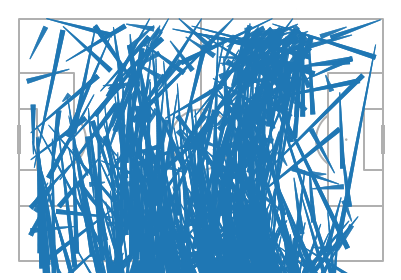

In [50]:
pitch = Pitch(pitch_type='statsbomb')
fig,ax = pitch.draw()

pitch.lines(df.x,df.y,df.endX,df.endY,comet=True,ax=ax)